In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
dataset = pd.read_csv('heart.csv')
dataset

/anaconda2/lib/python2.7/site-packages/mkl_fft/__init__.py:27: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  from ._pydfti import (fft, ifft, fft2, ifft2, fftn, ifftn, rfft, irfft,


,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,1
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,1
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,1
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,1


In [2]:
X = dataset.iloc[:, 0:13].values
Y = dataset.iloc[:, 13].values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1=LabelEncoder()
X[:,1]=labelencoder_X_1.fit_transform(X[:,1])
labelencoder_X_2=LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(units = 13, kernel_initializer = 'random_uniform', activation = 'relu', input_dim = 13))
classifier.add(Dense(units = 13, kernel_initializer = 'random_uniform', activation = 'relu'))
classifier.add(Dense(units = 11, kernel_initializer = 'random_uniform', activation = 'relu'))
classifier.add(Dense(units = 9, kernel_initializer = 'random_uniform', activation = 'relu'))
classifier.add(Dense(units = 5, kernel_initializer = 'random_uniform', activation = 'relu'))
classifier.add(Dense(units = 3, kernel_initializer = 'random_uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'random_uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])
classifier.fit(X_train, Y_train, batch_size = 25, epochs = 300, verbose=1, validation_split=0.2)
scores = classifier.evaluate(X_test,Y_test,verbose=0)
print("Testing - %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

Using TensorFlow backend.


Train on 161 samples, validate on 41 samples
Epoch 1/300
161/161 [==============================] - 1s 4ms/step - loss: 0.6932 - acc: 0.5155 - val_loss: 0.6925 - val_acc: 0.6829
Epoch 2/300
161/161 [==============================] - 0s 148us/step - loss: 0.6931 - acc: 0.5155 - val_loss: 0.6923 - val_acc: 0.6829
Epoch 3/300
161/161 [==============================] - 0s 171us/step - loss: 0.6931 - acc: 0.5155 - val_loss: 0.6918 - val_acc: 0.6829
Epoch 4/300
161/161 [==============================] - 0s 163us/step - loss: 0.6930 - acc: 0.5155 - val_loss: 0.6916 - val_acc: 0.6829
Epoch 5/300
161/161 [==============================] - 0s 172us/step - loss: 0.6930 - acc: 0.5155 - val_loss: 0.6914 - val_acc: 0.6829
Epoch 6/300
161/161 [==============================] - 0s 181us/step - loss: 0.6930 - acc: 0.5155 - val_loss: 0.6913 - val_acc: 0.6829
Epoch 7/300
161/161 [==============================] - 0s 186us/step - loss: 0.6930 - acc: 0.5155 - val_loss: 0.6910 - val_acc: 0.6829
Epoch 8/300


Epoch 61/300
161/161 [==============================] - 0s 252us/step - loss: 0.6643 - acc: 0.6025 - val_loss: 0.6414 - val_acc: 0.8780
Epoch 62/300
161/161 [==============================] - 0s 154us/step - loss: 0.6337 - acc: 0.8634 - val_loss: 0.6032 - val_acc: 0.8780
Epoch 63/300
161/161 [==============================] - 0s 141us/step - loss: 0.5828 - acc: 0.9068 - val_loss: 0.5400 - val_acc: 0.8780
Epoch 64/300
161/161 [==============================] - 0s 134us/step - loss: 0.5018 - acc: 0.9193 - val_loss: 0.4555 - val_acc: 0.8780
Epoch 65/300
161/161 [==============================] - 0s 151us/step - loss: 0.3970 - acc: 0.9068 - val_loss: 0.3778 - val_acc: 0.8780
Epoch 66/300
161/161 [==============================] - 0s 134us/step - loss: 0.3135 - acc: 0.9130 - val_loss: 0.3443 - val_acc: 0.8780
Epoch 67/300
161/161 [==============================] - 0s 130us/step - loss: 0.2740 - acc: 0.9006 - val_loss: 0.3535 - val_acc: 0.8780
Epoch 68/300
161/161 [==========================

161/161 [==============================] - 0s 187us/step - loss: 0.1876 - acc: 0.9379 - val_loss: 0.5538 - val_acc: 0.8049
Epoch 122/300
161/161 [==============================] - 0s 151us/step - loss: 0.1872 - acc: 0.9379 - val_loss: 0.5547 - val_acc: 0.7561
Epoch 123/300
161/161 [==============================] - 0s 145us/step - loss: 0.1862 - acc: 0.9503 - val_loss: 0.5618 - val_acc: 0.7561
Epoch 124/300
161/161 [==============================] - 0s 183us/step - loss: 0.1858 - acc: 0.9503 - val_loss: 0.5674 - val_acc: 0.7561
Epoch 125/300
161/161 [==============================] - 0s 176us/step - loss: 0.1848 - acc: 0.9503 - val_loss: 0.5715 - val_acc: 0.7561
Epoch 126/300
161/161 [==============================] - 0s 185us/step - loss: 0.1844 - acc: 0.9503 - val_loss: 0.5764 - val_acc: 0.7561
Epoch 127/300
161/161 [==============================] - 0s 180us/step - loss: 0.1838 - acc: 0.9503 - val_loss: 0.5820 - val_acc: 0.7561
Epoch 128/300
161/161 [==============================] 

Epoch 181/300
161/161 [==============================] - 0s 166us/step - loss: 0.1480 - acc: 0.9565 - val_loss: 0.6878 - val_acc: 0.7317
Epoch 182/300
161/161 [==============================] - 0s 195us/step - loss: 0.1477 - acc: 0.9565 - val_loss: 0.6822 - val_acc: 0.7317
Epoch 183/300
161/161 [==============================] - 0s 187us/step - loss: 0.1470 - acc: 0.9565 - val_loss: 0.6797 - val_acc: 0.7317
Epoch 184/300
161/161 [==============================] - 0s 198us/step - loss: 0.1463 - acc: 0.9565 - val_loss: 0.6756 - val_acc: 0.7317
Epoch 185/300
161/161 [==============================] - 0s 177us/step - loss: 0.1458 - acc: 0.9565 - val_loss: 0.6770 - val_acc: 0.7317
Epoch 186/300
161/161 [==============================] - 0s 191us/step - loss: 0.1452 - acc: 0.9565 - val_loss: 0.6807 - val_acc: 0.7317
Epoch 187/300
161/161 [==============================] - 0s 202us/step - loss: 0.1447 - acc: 0.9565 - val_loss: 0.6802 - val_acc: 0.7317
Epoch 188/300
161/161 [==================

Epoch 241/300
161/161 [==============================] - 0s 246us/step - loss: 0.0993 - acc: 0.9627 - val_loss: 0.8583 - val_acc: 0.7317
Epoch 242/300
161/161 [==============================] - 0s 177us/step - loss: 0.0985 - acc: 0.9627 - val_loss: 0.8730 - val_acc: 0.7317
Epoch 243/300
161/161 [==============================] - 0s 166us/step - loss: 0.0978 - acc: 0.9627 - val_loss: 0.8739 - val_acc: 0.7317
Epoch 244/300
161/161 [==============================] - 0s 179us/step - loss: 0.0970 - acc: 0.9627 - val_loss: 0.8855 - val_acc: 0.7317
Epoch 245/300
161/161 [==============================] - 0s 162us/step - loss: 0.0960 - acc: 0.9627 - val_loss: 0.8760 - val_acc: 0.7317
Epoch 246/300
161/161 [==============================] - 0s 199us/step - loss: 0.0951 - acc: 0.9627 - val_loss: 0.8924 - val_acc: 0.7317
Epoch 247/300
161/161 [==============================] - 0s 208us/step - loss: 0.0940 - acc: 0.9627 - val_loss: 0.9233 - val_acc: 0.7317
Epoch 248/300
161/161 [==================

161/161 [==============================] - 0s 193us/step - loss: 0.0631 - acc: 0.9814 - val_loss: 1.4042 - val_acc: 0.8293
Testing - acc: 79.41%


----------------------------------------------
Testing - acc: 81.48%


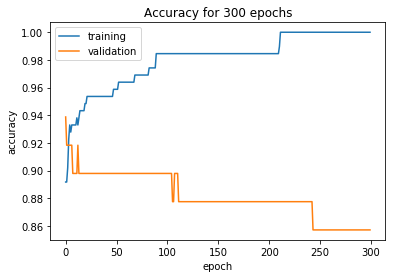

----------------------------------------------
Testing - acc: 100.00%


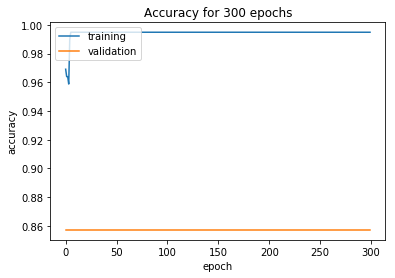

----------------------------------------------
Testing - acc: 92.59%


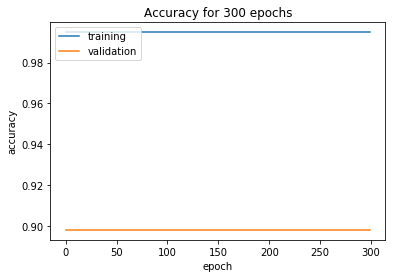

----------------------------------------------
Testing - acc: 100.00%


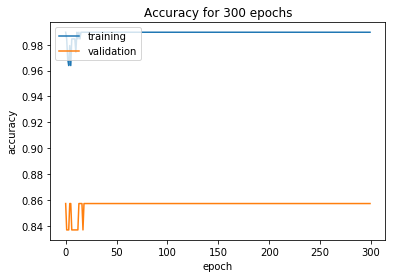

----------------------------------------------
Testing - acc: 100.00%


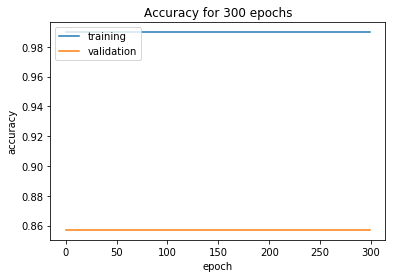

----------------------------------------------
Testing - acc: 100.00%


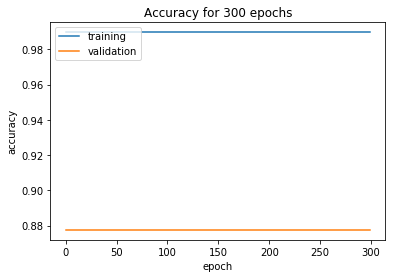

----------------------------------------------
Testing - acc: 92.59%


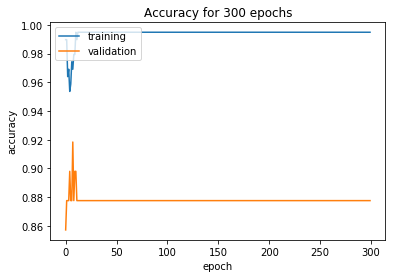

----------------------------------------------
Testing - acc: 92.59%


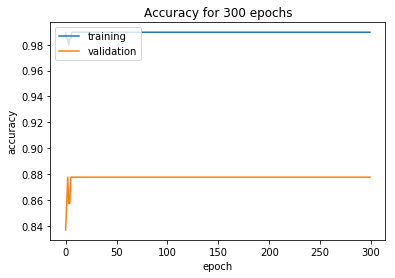

----------------------------------------------
Testing - acc: 92.59%


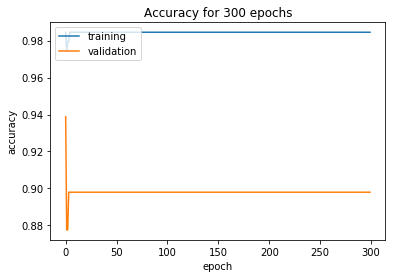

----------------------------------------------
Testing - acc: 92.59%


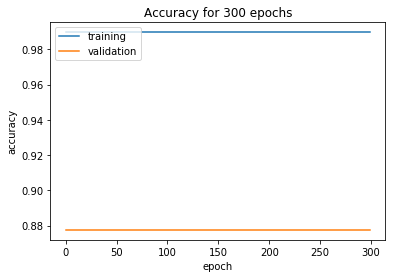

In [5]:
from sklearn.model_selection import StratifiedKFold
nsplits=10
seed = 7
np.random.seed(seed)
cvscores= [] 
kfold = StratifiedKFold(n_splits=nsplits, shuffle=True, random_state=seed)
for train, test in kfold.split(X, Y):
    print "----------------------------------------------"
    sc = StandardScaler()
    X_train=X[train]
    Y_train=Y[train]
    X_test=X[test]
    Y_test=Y[test]
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    history=classifier.fit(X_train, Y_train, batch_size = 25, epochs = 300, verbose=0, validation_split=0.2)
    scores = classifier.evaluate(X_test,Y_test,verbose=0)
    print("Testing - %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Accuracy for 300 epochs')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()

In [6]:
print cvscores
print("%.2f%% (+/- %.2f%%)\n" % (np.mean(cvscores), np.std(cvscores)))

[81.4814805984497, 100.0, 92.59259104728699, 100.0, 100.0, 100.0, 92.59259104728699, 92.59259104728699, 92.59259104728699, 92.59259104728699]
94.44% (+/- 5.56%)



In [ ]:
nsplits=10
seed = 7
maxepochs=1000
np.random.seed(seed)
cvscores= []
acclist = np.zeros(maxepochs)
vacclist = np.zeros(maxepochs)
kfold = StratifiedKFold(n_splits=nsplits, shuffle=True, random_state=seed)
for train, test in kfold.split(X, Y):
    print "----------------------------------------------"
    sc = StandardScaler()
    X_train=X[train]
    Y_train=Y[train]
    X_test=X[test]
    Y_test=Y[test]
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    history=classifier.fit(X_train, Y_train, batch_size = 25, epochs = maxepochs, verbose=1, validation_split=0.2)
    scores = classifier.evaluate(X_test,Y_test,verbose=0)
    print("Testing - %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    acclist=np.add(acclist,history.history['acc'])
    vacclist=np.add(vacclist,history.history['val_acc'])

----------------------------------------------
Train on 194 samples, validate on 49 samples
Epoch 1/1000
194/194 [==============================] - 0s 124us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0208 - val_acc: 0.8571
Epoch 2/1000
194/194 [==============================] - 0s 136us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0210 - val_acc: 0.8571
Epoch 3/1000
194/194 [==============================] - 0s 141us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0211 - val_acc: 0.8571
Epoch 4/1000
194/194 [==============================] - 0s 171us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0214 - val_acc: 0.8571
Epoch 5/1000
194/194 [==============================] - 0s 164us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0216 - val_acc: 0.8571
Epoch 6/1000
194/194 [==============================] - 0s 142us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0218 - val_acc: 0.8571
Epoch 7/1000
194/194 [==============================] - 0s 152us/step - loss: 0.1644 - acc: 

Epoch 60/1000
194/194 [==============================] - 0s 129us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0334 - val_acc: 0.8571
Epoch 61/1000
194/194 [==============================] - 0s 126us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0335 - val_acc: 0.8571
Epoch 62/1000
194/194 [==============================] - 0s 129us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0338 - val_acc: 0.8571
Epoch 63/1000
194/194 [==============================] - 0s 131us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0340 - val_acc: 0.8571
Epoch 64/1000
194/194 [==============================] - 0s 124us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0343 - val_acc: 0.8571
Epoch 65/1000
194/194 [==============================] - 0s 124us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0345 - val_acc: 0.8571
Epoch 66/1000
194/194 [==============================] - 0s 125us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0347 - val_acc: 0.8571
Epoch 67/1000
194/194 [==================

194/194 [==============================] - 0s 123us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0455 - val_acc: 0.8571
Epoch 120/1000
194/194 [==============================] - 0s 125us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0456 - val_acc: 0.8571
Epoch 121/1000
194/194 [==============================] - 0s 116us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0459 - val_acc: 0.8571
Epoch 122/1000
194/194 [==============================] - 0s 147us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0460 - val_acc: 0.8571
Epoch 123/1000
194/194 [==============================] - 0s 119us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0463 - val_acc: 0.8571
Epoch 124/1000
194/194 [==============================] - 0s 118us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0465 - val_acc: 0.8571
Epoch 125/1000
194/194 [==============================] - 0s 119us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0466 - val_acc: 0.8571
Epoch 126/1000
194/194 [=========================

194/194 [==============================] - 0s 118us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0560 - val_acc: 0.8571
Epoch 179/1000
194/194 [==============================] - 0s 128us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0562 - val_acc: 0.8571
Epoch 180/1000
194/194 [==============================] - 0s 114us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0563 - val_acc: 0.8571
Epoch 181/1000
194/194 [==============================] - 0s 116us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0564 - val_acc: 0.8571
Epoch 182/1000
194/194 [==============================] - 0s 115us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0566 - val_acc: 0.8571
Epoch 183/1000
194/194 [==============================] - 0s 126us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0569 - val_acc: 0.8571
Epoch 184/1000
194/194 [==============================] - 0s 118us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0571 - val_acc: 0.8571
Epoch 185/1000
194/194 [=========================

194/194 [==============================] - 0s 192us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0665 - val_acc: 0.8571
Epoch 238/1000
194/194 [==============================] - 0s 215us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0668 - val_acc: 0.8571
Epoch 239/1000
194/194 [==============================] - 0s 205us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0669 - val_acc: 0.8571
Epoch 240/1000
194/194 [==============================] - 0s 182us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0670 - val_acc: 0.8571
Epoch 241/1000
194/194 [==============================] - 0s 178us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0672 - val_acc: 0.8571
Epoch 242/1000
194/194 [==============================] - 0s 147us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0674 - val_acc: 0.8571
Epoch 243/1000
194/194 [==============================] - 0s 136us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0676 - val_acc: 0.8571
Epoch 244/1000
194/194 [=========================

194/194 [==============================] - 0s 177us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0781 - val_acc: 0.8571
Epoch 297/1000
194/194 [==============================] - 0s 162us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0783 - val_acc: 0.8571
Epoch 298/1000
194/194 [==============================] - 0s 169us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0785 - val_acc: 0.8571
Epoch 299/1000
194/194 [==============================] - 0s 163us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0788 - val_acc: 0.8571
Epoch 300/1000
194/194 [==============================] - 0s 184us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0789 - val_acc: 0.8571
Epoch 301/1000
194/194 [==============================] - 0s 190us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0789 - val_acc: 0.8571
Epoch 302/1000
194/194 [==============================] - 0s 172us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0792 - val_acc: 0.8571
Epoch 303/1000
194/194 [=========================

194/194 [==============================] - 0s 259us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0902 - val_acc: 0.8571
Epoch 356/1000
194/194 [==============================] - 0s 182us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0904 - val_acc: 0.8571
Epoch 357/1000
194/194 [==============================] - 0s 242us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0907 - val_acc: 0.8571
Epoch 358/1000
194/194 [==============================] - 0s 190us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0908 - val_acc: 0.8571
Epoch 359/1000
194/194 [==============================] - 0s 182us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0911 - val_acc: 0.8571
Epoch 360/1000
194/194 [==============================] - 0s 138us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0913 - val_acc: 0.8571
Epoch 361/1000
194/194 [==============================] - 0s 201us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.0916 - val_acc: 0.8571
Epoch 362/1000
194/194 [=========================

194/194 [==============================] - 0s 128us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1029 - val_acc: 0.8571
Epoch 415/1000
194/194 [==============================] - 0s 127us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1031 - val_acc: 0.8571
Epoch 416/1000
194/194 [==============================] - 0s 117us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1033 - val_acc: 0.8571
Epoch 417/1000
194/194 [==============================] - 0s 121us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1035 - val_acc: 0.8571
Epoch 418/1000
194/194 [==============================] - 0s 118us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1039 - val_acc: 0.8571
Epoch 419/1000
194/194 [==============================] - 0s 122us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1041 - val_acc: 0.8571
Epoch 420/1000
194/194 [==============================] - 0s 134us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1041 - val_acc: 0.8571
Epoch 421/1000
194/194 [=========================

194/194 [==============================] - 0s 122us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1161 - val_acc: 0.8571
Epoch 474/1000
194/194 [==============================] - 0s 138us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1161 - val_acc: 0.8571
Epoch 475/1000
194/194 [==============================] - 0s 118us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1163 - val_acc: 0.8571
Epoch 476/1000
194/194 [==============================] - 0s 134us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1169 - val_acc: 0.8571
Epoch 477/1000
194/194 [==============================] - 0s 144us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1169 - val_acc: 0.8571
Epoch 478/1000
194/194 [==============================] - 0s 137us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1169 - val_acc: 0.8571
Epoch 479/1000
194/194 [==============================] - 0s 120us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1174 - val_acc: 0.8571
Epoch 480/1000
194/194 [=========================

194/194 [==============================] - 0s 146us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1288 - val_acc: 0.8571
Epoch 533/1000
194/194 [==============================] - 0s 138us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1288 - val_acc: 0.8571
Epoch 534/1000
194/194 [==============================] - 0s 211us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1295 - val_acc: 0.8571
Epoch 535/1000
194/194 [==============================] - 0s 302us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1295 - val_acc: 0.8571
Epoch 536/1000
194/194 [==============================] - 0s 201us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1299 - val_acc: 0.8571
Epoch 537/1000
194/194 [==============================] - 0s 209us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1299 - val_acc: 0.8571
Epoch 538/1000
194/194 [==============================] - 0s 249us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1307 - val_acc: 0.8571
Epoch 539/1000
194/194 [=========================

194/194 [==============================] - 0s 154us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1424 - val_acc: 0.8571
Epoch 592/1000
194/194 [==============================] - 0s 164us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1430 - val_acc: 0.8571
Epoch 593/1000
194/194 [==============================] - 0s 132us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1435 - val_acc: 0.8571
Epoch 594/1000
194/194 [==============================] - 0s 129us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1435 - val_acc: 0.8571
Epoch 595/1000
194/194 [==============================] - 0s 136us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1440 - val_acc: 0.8571
Epoch 596/1000
194/194 [==============================] - 0s 129us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1440 - val_acc: 0.8571
Epoch 597/1000
194/194 [==============================] - 0s 137us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1440 - val_acc: 0.8571
Epoch 598/1000
194/194 [=========================

194/194 [==============================] - 0s 143us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1561 - val_acc: 0.8571
Epoch 651/1000
194/194 [==============================] - 0s 149us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1561 - val_acc: 0.8571
Epoch 652/1000
194/194 [==============================] - 0s 130us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1570 - val_acc: 0.8571
Epoch 653/1000
194/194 [==============================] - 0s 143us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1577 - val_acc: 0.8571
Epoch 654/1000
194/194 [==============================] - 0s 137us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1577 - val_acc: 0.8571
Epoch 655/1000
194/194 [==============================] - 0s 143us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1576 - val_acc: 0.8571
Epoch 656/1000
194/194 [==============================] - 0s 156us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1576 - val_acc: 0.8571
Epoch 657/1000
194/194 [=========================

194/194 [==============================] - 0s 135us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1703 - val_acc: 0.8571
Epoch 710/1000
194/194 [==============================] - 0s 157us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1703 - val_acc: 0.8571
Epoch 711/1000
194/194 [==============================] - 0s 154us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1703 - val_acc: 0.8571
Epoch 712/1000
194/194 [==============================] - 0s 195us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1716 - val_acc: 0.8571
Epoch 713/1000
194/194 [==============================] - 0s 185us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1716 - val_acc: 0.8571
Epoch 714/1000
194/194 [==============================] - 0s 160us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1716 - val_acc: 0.8571
Epoch 715/1000
194/194 [==============================] - 0s 163us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1716 - val_acc: 0.8571
Epoch 716/1000
194/194 [=========================

194/194 [==============================] - 0s 131us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1847 - val_acc: 0.8571
Epoch 769/1000
194/194 [==============================] - 0s 133us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1847 - val_acc: 0.8571
Epoch 770/1000
194/194 [==============================] - 0s 137us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1847 - val_acc: 0.8571
Epoch 771/1000
194/194 [==============================] - 0s 118us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1847 - val_acc: 0.8571
Epoch 772/1000
194/194 [==============================] - 0s 126us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1859 - val_acc: 0.8571
Epoch 773/1000
194/194 [==============================] - 0s 117us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1859 - val_acc: 0.8571
Epoch 774/1000
194/194 [==============================] - 0s 132us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1859 - val_acc: 0.8571
Epoch 775/1000
194/194 [=========================

194/194 [==============================] - 0s 144us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1970 - val_acc: 0.8571
Epoch 828/1000
194/194 [==============================] - 0s 133us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1985 - val_acc: 0.8571
Epoch 829/1000
194/194 [==============================] - 0s 183us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1985 - val_acc: 0.8571
Epoch 830/1000
194/194 [==============================] - 0s 168us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.1985 - val_acc: 0.8571
Epoch 831/1000
194/194 [==============================] - 0s 169us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.2016 - val_acc: 0.8571
Epoch 832/1000
194/194 [==============================] - 0s 173us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.2016 - val_acc: 0.8571
Epoch 833/1000
194/194 [==============================] - 0s 155us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.2016 - val_acc: 0.8571
Epoch 834/1000
194/194 [=========================

194/194 [==============================] - 0s 135us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.2151 - val_acc: 0.8571
Epoch 887/1000
194/194 [==============================] - 0s 154us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.2151 - val_acc: 0.8571
Epoch 888/1000
194/194 [==============================] - 0s 148us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.2151 - val_acc: 0.8571
Epoch 889/1000
194/194 [==============================] - 0s 128us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.2151 - val_acc: 0.8571
Epoch 890/1000
194/194 [==============================] - 0s 128us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.2151 - val_acc: 0.8571
Epoch 891/1000
194/194 [==============================] - 0s 147us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.2151 - val_acc: 0.8571
Epoch 892/1000
194/194 [==============================] - 0s 133us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.2151 - val_acc: 0.8571
Epoch 893/1000
194/194 [=========================

Epoch 945/1000
194/194 [==============================] - 0s 156us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.2254 - val_acc: 0.8571
Epoch 946/1000
194/194 [==============================] - 0s 160us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.2254 - val_acc: 0.8571
Epoch 947/1000
194/194 [==============================] - 0s 150us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.2254 - val_acc: 0.8571
Epoch 948/1000
194/194 [==============================] - 0s 140us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.2254 - val_acc: 0.8571
Epoch 949/1000
194/194 [==============================] - 0s 156us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.2254 - val_acc: 0.8571
Epoch 950/1000
194/194 [==============================] - 0s 150us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.2254 - val_acc: 0.8571
Epoch 951/1000
194/194 [==============================] - 0s 157us/step - loss: 0.1644 - acc: 0.9897 - val_loss: 2.2254 - val_acc: 0.8571
Epoch 952/1000
194/194 [==========

194/194 [==============================] - 0s 170us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.0857 - val_acc: 0.8571
Epoch 4/1000
194/194 [==============================] - 0s 199us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.1083 - val_acc: 0.8571
Epoch 5/1000
194/194 [==============================] - 0s 142us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.1192 - val_acc: 0.8571
Epoch 6/1000
194/194 [==============================] - 0s 150us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.1237 - val_acc: 0.8571
Epoch 7/1000
194/194 [==============================] - 0s 147us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.1293 - val_acc: 0.8571
Epoch 8/1000
194/194 [==============================] - 0s 151us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.1337 - val_acc: 0.8571
Epoch 9/1000
194/194 [==============================] - 0s 140us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.1394 - val_acc: 0.8571
Epoch 10/1000
194/194 [==============================] - 0s 1

Epoch 63/1000
194/194 [==============================] - 0s 129us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.2026 - val_acc: 0.8571
Epoch 64/1000
194/194 [==============================] - 0s 123us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.2025 - val_acc: 0.8571
Epoch 65/1000
194/194 [==============================] - 0s 124us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.2024 - val_acc: 0.8571
Epoch 66/1000
194/194 [==============================] - 0s 122us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.2022 - val_acc: 0.8571
Epoch 67/1000
194/194 [==============================] - 0s 125us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.2020 - val_acc: 0.8571
Epoch 68/1000
194/194 [==============================] - 0s 126us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.2034 - val_acc: 0.8571
Epoch 69/1000
194/194 [==============================] - 0s 126us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.2035 - val_acc: 0.8571
Epoch 70/1000
194/194 [==================

194/194 [==============================] - 0s 126us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.2250 - val_acc: 0.8571
Epoch 123/1000
194/194 [==============================] - 0s 124us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.2250 - val_acc: 0.8571
Epoch 124/1000
194/194 [==============================] - 0s 126us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.2250 - val_acc: 0.8571
Epoch 125/1000
194/194 [==============================] - 0s 121us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.2250 - val_acc: 0.8571
Epoch 126/1000
194/194 [==============================] - 0s 120us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.2249 - val_acc: 0.8571
Epoch 127/1000
194/194 [==============================] - 0s 123us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.2332 - val_acc: 0.8571
Epoch 128/1000
194/194 [==============================] - 0s 125us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.2332 - val_acc: 0.8571
Epoch 129/1000
194/194 [=========================

Epoch 181/1000
194/194 [==============================] - 0s 164us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.2375 - val_acc: 0.8571
Epoch 182/1000
194/194 [==============================] - 0s 166us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.2375 - val_acc: 0.8571
Epoch 183/1000
194/194 [==============================] - 0s 174us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.2375 - val_acc: 0.8571
Epoch 184/1000
194/194 [==============================] - 0s 135us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.2375 - val_acc: 0.8571
Epoch 185/1000
194/194 [==============================] - 0s 129us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.2375 - val_acc: 0.8571
Epoch 186/1000
194/194 [==============================] - 0s 142us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.2375 - val_acc: 0.8571
Epoch 187/1000
194/194 [==============================] - 0s 127us/step - loss: 0.2465 - acc: 0.9845 - val_loss: 2.2407 - val_acc: 0.8571
Epoch 188/1000
194/194 [==========

In [ ]:
print cvscores
print("%.2f%% (+/- %.2f%%)\n" % (np.mean(cvscores), np.std(cvscores)))

In [ ]:
plt.plot(acclist/nsplits)
plt.plot(vacclist/nsplits)
plt.title('Average model accuracy for 1000 epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(acclist/vacclist)
plt.title('Training/Validation')
plt.ylabel('ratio')
plt.xlabel('epoch')
plt.show()